In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import math
import itertools

#fx1 = lambda x1,x2,gamma:(x1**2 + x2 ** 2 * gamma)/2
pi = math.pi
def log(x):
    return math.log(x)
def cos(x):
    return math.cos(x)
def sin(x):
    return math.sin(x)
def exp(x):
    return np.exp(x)
def real(x):
    return np.real(x)
def imag(x):
    return np.imag(x)

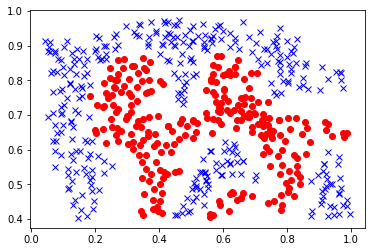

In [106]:
df = pd.read_csv("train_2d.txt", sep=',')
df_x = df[['x1','x2']]
df_y = df['y']
df_sub1 = df[df['y'] == 0]
df_sub2 = df[df['y'] == 1]
plt.plot(df_sub1['x1'],df_sub1['x2'],'ro')
plt.plot(df_sub2['x1'],df_sub2['x2'],'bx')

In [78]:


def sigmoid(x,seta):
    #think x,seta as n * m - numpy array
    # x = n x m seta = m array
    # output as n*1 array
    
    return 1 / (1+ np.exp(-1*np.matmul(x,seta)))

def log_gradient(x,y,seta):
    # y = n *1
    z = np.matmul(sigmoid(x,seta)-y,x)
    return z/y.size

# using =X D X^T
# where X = x, D = diagonal matrix that has h(z)(1-h(z))
# ref = https://stats.stackexchange.com/questions/68391/hessian-of-logistic-function
def log_hessian(x,y,seta):
    #first step get diagonal mtx 
  
    m = y.size
    D = np.zeros((m,m))
    for i,x_i in enumerate(x):
        h = sigmoid(x_i, seta)
       # print(h)
        D[i][i] = h * (1-h)
    
   # print('------------------')
   # print(seta)
    #print('------------------')
    #print(D)
    # y = n *1
    #A = np.matmul(x,D)
    xt = np.transpose(x)
   
    H = np.matmul(np.matmul(xt,D),x)
    
    return H

class LogsitcRegression_custom(object):
   
    def __init__(self,solver,itr, alpha):
        self.solver = solver
        self.itr = itr
        self.alpha = alpha
    
    def fit(self,x,y):        
        if self.solver == 'gradient':
            m = y.size
            n = x.loc[0].size+1
            seta = np.zeros((n))
            ny = y.to_numpy()
            nx_ = x.to_numpy()
            #print((np.zeros(m) + 1).shape)
            nx = np.hstack([np.ones(m).reshape(m,1),x.to_numpy()])
            print(nx)
            nx = nx/np.linalg.norm(nx, ord=2, axis=1, keepdims=True)
            
            for i in tqdm(range(1,self.itr),mininterval=1):

                #for j in range(1,m):
                z = nx.dot(seta)
                h = 1 / (np.exp((-1)* z) + 1)
                y_ = h
                y_check = np.rint(y_)
              #  print(y_check)
                distance = np.linalg.norm(ny-y_check,ord=1)
                if (i % 100) == 1:
                    print(str((m-distance) / m * 100) + '% accuracy' )

                gdsum = np.zeros((n))
                for j in range (0,m):
                    for k in range (0,n): 
                        gdsum[k] += ((ny[j] - y_[j]) * nx[j][k]) / m
                     #   gdsum[1] += ((ny[j] - y_[j]) * nx[j][1]) / m
                     #   gdsum[2] += ((ny[j] - y_[j]) * nx[j][2]) / m
           #     print(seta)
                seta = seta + self.alpha * gdsum
            self.seta = seta
        elif self.solver == 'newton':
            m = y.size
            n = x.loc[0].size
            
            seta = np.zeros((n))
            ny = y.to_numpy()
            nx = x.to_numpy()
           # print(ny)
            for i in tqdm(range(1,self.itr),mininterval=1):
              
                G_ = log_gradient(nx,ny,seta)
                H_ = log_hessian(nx,ny,seta)
                H_inv = np.linalg.inv(H_)
              #  print(H_inv)
              #  print(G_)
                seta = seta - self.alpha * (np.matmul(H_inv , G_))
                if (i % 100) == 1:
                    z = nx.dot(seta)
                    h = 1 / (np.exp((-1)* z) + 1)
                    y_ = h
                    y_check = np.rint(y_)
                    distance = np.linalg.norm(ny-y_check,ord=1)
                    #sigmoid (x,seta)
                    print(str((m-distance) / m * 100) + '% accuracy' )

            self.seta = seta
       
    def predict (self,x):
        nx = x.to_numpy()
        z = nx.dot(self.seta)
        h = 1 / (np.exp((-1)* z) + 1)
        y_ = np.rint(h)
        return y_
    def getseta (self):
        return self.seta

In [79]:
lr = LogsitcRegression_custom(solver = 'gradient', itr = 10000, alpha = 0.2)
lr.fit(df_x,df_y)
seta = lr.getseta()

#lr.custom

[[1.       0.146313 0.402632]
 [1.       0.367512 0.63962 ]
 [1.       0.563364 0.59576 ]
 ...
 [1.       0.975806 0.439474]
 [1.       0.160138 0.777047]
 [1.       0.46659  0.67617 ]]


  0%|                                                 | 0/9999 [00:00<?, ?it/s]

43.59861591695502% accuracy
56.40138408304498% accuracy


  2%|▋                                     | 167/9999 [00:01<00:58, 166.67it/s]

56.40138408304498% accuracy
52.07612456747405% accuracy


  3%|█▎                                    | 331/9999 [00:02<00:58, 165.66it/s]

54.15224913494809% accuracy


  5%|█▉                                    | 498/9999 [00:03<00:57, 165.96it/s]

56.57439446366782% accuracy
58.65051903114187% accuracy


  7%|██▌                                   | 659/9999 [00:04<00:56, 164.44it/s]

58.99653979238755% accuracy
58.47750865051903% accuracy


  8%|███▏                                  | 823/9999 [00:05<00:55, 164.26it/s]

56.92041522491349% accuracy


 10%|███▋                                  | 983/9999 [00:06<00:55, 162.81it/s]

56.57439446366782% accuracy
55.536332179930795% accuracy


 11%|████▏                                | 1133/9999 [00:07<00:55, 158.49it/s]

55.017301038062286% accuracy


 13%|████▊                                | 1296/9999 [00:08<00:54, 159.58it/s]

54.67128027681662% accuracy
54.498269896193776% accuracy


 15%|█████▍                               | 1460/9999 [00:09<00:53, 160.74it/s]

54.498269896193776% accuracy
54.325259515570934% accuracy


 16%|██████                               | 1625/9999 [00:10<00:51, 161.95it/s]

54.67128027681662% accuracy


 18%|██████▋                              | 1794/9999 [00:11<00:50, 164.00it/s]

54.67128027681662% accuracy
54.498269896193776% accuracy


 20%|███████▎                             | 1962/9999 [00:12<00:48, 164.94it/s]

54.844290657439444% accuracy
54.844290657439444% accuracy


 21%|███████▊                             | 2125/9999 [00:13<00:48, 161.23it/s]

55.017301038062286% accuracy


 23%|████████▍                            | 2293/9999 [00:14<00:47, 163.20it/s]

55.19031141868512% accuracy
55.19031141868512% accuracy


 25%|█████████                            | 2462/9999 [00:15<00:45, 164.80it/s]

55.36332179930796% accuracy
55.36332179930796% accuracy


 26%|█████████▋                           | 2627/9999 [00:16<00:45, 163.73it/s]

55.536332179930795% accuracy


 28%|██████████▎                          | 2793/9999 [00:17<00:43, 164.31it/s]

55.536332179930795% accuracy
55.70934256055363% accuracy


 30%|██████████▉                          | 2961/9999 [00:18<00:42, 165.35it/s]

55.88235294117647% accuracy
55.88235294117647% accuracy


 31%|███████████▌                         | 3127/9999 [00:19<00:41, 164.61it/s]

55.88235294117647% accuracy


 33%|████████████▏                        | 3295/9999 [00:20<00:40, 165.51it/s]

56.22837370242214% accuracy
56.22837370242214% accuracy


 35%|████████████▊                        | 3463/9999 [00:21<00:39, 166.20it/s]

56.40138408304498% accuracy
56.747404844290664% accuracy


 36%|█████████████▍                       | 3630/9999 [00:22<00:38, 165.99it/s]

56.747404844290664% accuracy


 38%|██████████████                       | 3796/9999 [00:23<00:37, 164.56it/s]

56.747404844290664% accuracy
56.40138408304498% accuracy


 40%|██████████████▋                      | 3964/9999 [00:24<00:36, 165.38it/s]

56.57439446366782% accuracy
56.40138408304498% accuracy


 41%|███████████████▎                     | 4130/9999 [00:25<00:35, 163.42it/s]

56.40138408304498% accuracy


 43%|███████████████▉                     | 4295/9999 [00:26<00:34, 163.84it/s]

56.40138408304498% accuracy
56.40138408304498% accuracy


 45%|████████████████▍                    | 4459/9999 [00:27<00:33, 163.25it/s]

56.40138408304498% accuracy
56.22837370242214% accuracy


 46%|█████████████████                    | 4623/9999 [00:28<00:33, 162.07it/s]

56.22837370242214% accuracy


 48%|█████████████████▋                   | 4791/9999 [00:29<00:31, 163.76it/s]

56.22837370242214% accuracy
56.22837370242214% accuracy


 50%|██████████████████▎                  | 4955/9999 [00:30<00:30, 163.49it/s]

56.22837370242214% accuracy
56.22837370242214% accuracy


 51%|██████████████████▉                  | 5119/9999 [00:31<00:30, 162.38it/s]

56.22837370242214% accuracy


 53%|███████████████████▌                 | 5282/9999 [00:32<00:29, 162.56it/s]

56.22837370242214% accuracy
56.22837370242214% accuracy


 54%|████████████████████▏                | 5445/9999 [00:33<00:28, 161.29it/s]

56.40138408304498% accuracy
56.40138408304498% accuracy


 56%|████████████████████▊                | 5608/9999 [00:34<00:27, 161.66it/s]

56.40138408304498% accuracy


 58%|█████████████████████▍               | 5777/9999 [00:35<00:25, 163.60it/s]

56.40138408304498% accuracy
56.22837370242214% accuracy


 59%|█████████████████████▉               | 5944/9999 [00:36<00:24, 164.41it/s]

56.22837370242214% accuracy
56.22837370242214% accuracy


 61%|██████████████████████▌              | 6110/9999 [00:37<00:23, 164.54it/s]

56.22837370242214% accuracy


 63%|███████████████████████▏             | 6275/9999 [00:38<00:23, 161.25it/s]

56.22837370242214% accuracy
56.22837370242214% accuracy


 64%|███████████████████████▊             | 6437/9999 [00:39<00:22, 160.18it/s]

56.05536332179931% accuracy


 66%|████████████████████████▍            | 6598/9999 [00:40<00:21, 160.23it/s]

56.05536332179931% accuracy
56.05536332179931% accuracy


 68%|█████████████████████████            | 6760/9999 [00:41<00:20, 160.66it/s]

56.05536332179931% accuracy
56.05536332179931% accuracy


 69%|█████████████████████████▌           | 6922/9999 [00:42<00:19, 161.01it/s]

55.88235294117647% accuracy


 71%|██████████████████████████▏          | 7084/9999 [00:43<00:18, 157.54it/s]

56.05536332179931% accuracy
56.05536332179931% accuracy


 72%|██████████████████████████▊          | 7249/9999 [00:44<00:17, 159.48it/s]

56.05536332179931% accuracy
56.05536332179931% accuracy


 74%|███████████████████████████▍         | 7409/9999 [00:45<00:16, 159.54it/s]

56.05536332179931% accuracy


 76%|████████████████████████████         | 7572/9999 [00:46<00:15, 160.56it/s]

56.05536332179931% accuracy
56.05536332179931% accuracy


 77%|████████████████████████████▌        | 7733/9999 [00:47<00:14, 159.74it/s]

56.05536332179931% accuracy


 79%|█████████████████████████████▏       | 7896/9999 [00:48<00:13, 160.61it/s]

55.88235294117647% accuracy
55.88235294117647% accuracy


 81%|█████████████████████████████▊       | 8057/9999 [00:49<00:12, 160.20it/s]

55.88235294117647% accuracy
55.88235294117647% accuracy


 82%|██████████████████████████████▍      | 8218/9999 [00:50<00:11, 160.20it/s]

55.88235294117647% accuracy


 84%|███████████████████████████████      | 8383/9999 [00:51<00:10, 161.56it/s]

55.88235294117647% accuracy
55.88235294117647% accuracy


 85%|███████████████████████████████▋     | 8548/9999 [00:52<00:08, 162.34it/s]

55.88235294117647% accuracy
55.88235294117647% accuracy


 87%|████████████████████████████████▏    | 8712/9999 [00:53<00:07, 162.78it/s]

55.88235294117647% accuracy


 89%|████████████████████████████████▊    | 8875/9999 [00:54<00:06, 162.70it/s]

55.88235294117647% accuracy
56.05536332179931% accuracy


 90%|█████████████████████████████████▍   | 9038/9999 [00:55<00:05, 161.01it/s]

56.05536332179931% accuracy
56.05536332179931% accuracy


 92%|██████████████████████████████████   | 9202/9999 [00:56<00:04, 161.89it/s]

56.05536332179931% accuracy


 94%|██████████████████████████████████▋  | 9365/9999 [00:57<00:03, 162.03it/s]

56.22837370242214% accuracy
56.22837370242214% accuracy


 95%|███████████████████████████████████▎ | 9528/9999 [00:58<00:02, 160.17it/s]

56.22837370242214% accuracy


 97%|███████████████████████████████████▊ | 9689/9999 [00:59<00:01, 160.22it/s]

56.22837370242214% accuracy
56.22837370242214% accuracy


 99%|████████████████████████████████████▍| 9850/9999 [01:00<00:00, 159.36it/s]

56.22837370242214% accuracy


100%|█████████████████████████████████████| 9999/9999 [01:01<00:00, 162.27it/s]


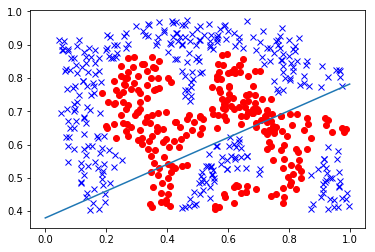

In [80]:
plt.plot(df_sub1['x1'],df_sub1['x2'],'ro')
plt.plot(df_sub2['x1'],df_sub2['x2'],'bx')
drawx1 =  np.linspace(0, 1, 100)
#s0 + x1 s1 + x2 s2 = 0 인점은
# x2 = (-s0 - s1) x1  / s2
drawx2 = (-seta[0] - seta[1] * drawx1) / seta[2]
#for i,x1 in enumerate(drawx1):
plt.plot(drawx1,drawx2)

In [33]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(df_x, df_y)
clf.score(df_x, df_y)

0.5536332179930796

In [139]:
class NaiveBayesClassifier_cont_input:
    def __init__(self, k=0.5,method = 'g-distribution'):
        self.k = k
        self.word_probs = []
        self.method = 'g-distribution'
    def fit(self, x,y):
        xy = pd.concat([x, y], axis=1)
        #print(xy)
        if self.method == 'g-distribution':
            #x1, x2 ... 에 대해서 가우시안 분포를 만든다.
            m = y.size
            n = x.loc[0].size       
            self.n = n
            ny = y.to_numpy()
            nx = x.to_numpy()
            fx_list = []
            for i in range (0,n):
                xy_0 = xy[xy['y'] == 0]
                xy_1 = xy[xy['y'] == 1]
                self.py1 = xy_0.shape[0]
                self.py2 = xy_1.shape[0]
                
                nx_y0_mean = xy_0.iloc[:,i].mean()
                nx_y0_var = xy_0.iloc[:,i].var()
                nx_y1_mean = xy_1.iloc[:,i].mean()
                nx_y1_var = xy_1.iloc[:,i].var()                
                
                print(nx_y0_mean,nx_y0_var)
                print(nx_y1_mean,nx_y1_var)
                fx1 = lambda x__ : (2* pi * nx_y0_var) ** (-0.5) * exp( -((x__-nx_y0_mean)** 2) /  (2 * nx_y0_var))
                fx2 = lambda x__ : (2* pi * nx_y1_var) ** (-0.5) * exp( -((x__-nx_y1_mean)** 2) /  (2 * nx_y1_var) )                                                    
                fx_list.append((fx1,fx2))
            self.gaussians = fx_list
    def classify(self, x):
        if self.method == 'g-distribution':
            mul1 = 1
            mul2 = 1
            for i in range (0,self.n):
                (fx1,fx2) = self.gaussians[i]
                print( x[i] , fx1(x[i]))
                mul1 = mul1 * fx1(x[i]) 
                mul2 = mul2 * fx2(x[i])
                #print(mul1,mul2)
            summer = mul2 / (mul1+ mul2)
            print ('finall prob = ' +str(summer))
            return summer
        

In [144]:
NB = NaiveBayesClassifier_cont_input(k = '0.5', method = 'g-distribution')
NB.fit(df_x,df_y)

r_y = []
for index, xx in df_x.iterrows():
  #  print(xx)
   # print(xx[0])
    prob1 = NB.classify(xx)
    if prob1 >= 0.5:
        r_y.append (1)
    else:
        r_y.append (0)

#df_trained = df_x.append(r_y)

0.536875503968254 0.0405437961788964
0.4766192607361964 0.08243313568150064
0.66040680952381 0.01385009915923848
0.7250484693251535 0.032444041426631376
0.146313 0.00024350275993113924
0.402632 0.30788487353636657
finall prob = 0.9869395164306648
0.367512 0.15317076569787486
0.63962 3.3374066476255924
finall prob = 0.5445949533192889
0.5633640000000001 2.4128783395924676
0.5957600000000001 2.915146231857301
finall prob = 0.26485983807266084
0.123272 0.0001015668557349884
0.791667 1.8199394404301585
finall prob = 0.9894083446859359
0.173963 0.0006610653636460923
0.620322 3.1988340874959995
finall prob = 0.9478423191745086
0.268433 0.013222135120925153
0.66155 3.3897146052951244
finall prob = 0.8053620587686919
0.33755799999999997 0.0787052900257852
0.9612569999999999 0.12915746736572364
finall prob = 0.952813240557838
0.770737 2.1844117369783422
0.8896200000000001 0.5086999115891916
finall prob = 0.7379517172556669
0.190092 0.0011539484240959412
0.520175 1.6667433364894082
finall prob =

0.540323 2.01418498689215
0.439474 0.5819705136741038
finall prob = 0.41308606655835917
0.224654 0.0035740706074021025
0.722953 2.9434005068570515
finall prob = 0.9077032927996739
0.514977 1.5797500303242091
0.818421 1.3763155474045332
finall prob = 0.499807328446652
0.0587558 7.159104137048724e-06
0.88231 0.5730119376330702
finall prob = 0.9988553172749816
0.706221 3.1425024582424483
0.8219299999999999 1.321717127161976
finall prob = 0.5040743698316629
0.708525 3.1180459135858882
0.674708 3.3649376145406533
finall prob = 0.3092738074405084
0.521889 1.6957409140187178
0.927632 0.2573954169468442
finall prob = 0.7596628911632489
0.703917 3.165937167459598
0.907164 0.37630540950849556
finall prob = 0.7103856093231907
0.328341 0.06329417032973578
0.9290940000000001 0.2502169528539444
finall prob = 0.9351576303363744
0.273041 0.015052400797005932
0.858772 0.818952358692512
finall prob = 0.9283797437142977
0.33755799999999997 0.0787052900257852
0.92617 0.26473896418920434
finall prob = 0.92

0.9965440000000001 0.05737339029207539
0.414912 0.38484261946925613
finall prob = 0.9418701397655627
0.11635899999999999 7.754759820795684e-05
0.5445909999999999 2.088741345198308
finall prob = 0.9838042872186786
0.611751 3.112194979887188
0.7141810000000001 3.053845057685787
finall prob = 0.29712820163463716
0.43893999999999994 0.577028277695147
0.591374 2.854090965057587
finall prob = 0.3904467934874235
0.623272 3.2252487753718433
0.5577489999999999 2.317154274588912
finall prob = 0.26659477916973995
0.738479 2.720317899361107
0.8896200000000001 0.5086999115891916
finall prob = 0.6995881571866144
0.397465 0.2793862165600622
0.698099 3.2203962938738018
finall prob = 0.5077592692384908
0.164747 0.0004768022051961554
0.844298 1.000008512044529
finall prob = 0.9849537598360639
0.837558 1.0918321802390396
0.779971 2.0232600968168875
finall prob = 0.6355789047525516
0.53341 1.8937366974822767
0.5359649999999999 1.93816967704337
finall prob = 0.3043005590581194
0.0449309 3.899813089218683e-

finall prob = 0.2855489823369347
0.169355 0.0005618549854704124
0.626462 3.2517578652672428
finall prob = 0.9519722648524989
0.34447 0.09230569524698554
0.665936 3.386135286976108
finall prob = 0.6147492637412083
0.247696 0.007239028963794584
0.806287 1.5722853227000229
finall prob = 0.9207603398842933
0.44354799999999994 0.6206751763628485
0.9232459999999999 0.2799309424279521
finall prob = 0.819641131035513
0.365207 0.1458555355951176
0.765351 2.2777868883936074
finall prob = 0.6618920115779319
0.9274190000000001 0.2584549735317815
0.407895 0.33923045658776574
finall prob = 0.8633236796221303
0.19700499999999999 0.0014567566065875766
0.45 0.6856228288799825
finall prob = 0.9541901193506909
0.43663599999999997 0.5560499096380563
0.9100879999999999 0.3570934912582606
finall prob = 0.8017738028212084
0.8006909999999999 1.6658594394171453
0.8662280000000001 0.7345308338754061
finall prob = 0.7297184011610155
0.68318 3.326997898577733
0.9232459999999999 0.2799309424279521
finall prob = 0.

finall prob = 0.8656506759494813
0.5748850000000001 2.6032279775896
0.756579 2.4275757526784205
finall prob = 0.3506661494989707
0.828341 1.2246821521512066
0.850146 0.9241587215220822
finall prob = 0.7428719480144962
0.782258 1.9833319663938769
0.425439 0.46193597688389026
finall prob = 0.5607183022022323
0.782258 1.9833319663938769
0.46929799999999994 0.9069189098761301
finall prob = 0.4862106473138174
0.761521 2.343616406598027
0.765351 2.2777868883936074
finall prob = 0.46752802831067103
0.8237329999999999 0.0001447583984785435
0.44122799999999995 0.5984171121980868
finall prob = 0.9865011150722933
0.644009 3.3571279311209605
0.563596 2.416799070646135
finall prob = 0.2677436986992688
0.118664 8.48803962161426e-05
0.48859600000000003 1.1678148122927068
finall prob = 0.9863617911465324
0.199309 0.0015731955291202553
0.8837719999999999 0.5597025879037616
finall prob = 0.9816107631547747
0.514977 1.5797500303242091
0.48859600000000003 1.1678148122927068
finall prob = 0.362676108192867

finall prob = 0.7540019595328262
0.199309 0.0015731955291202553
0.655263 3.3866381276811124
finall prob = 0.9234692544364514
0.5541470000000001 2.255052352502106
0.499123 1.3254094024967307
finall prob = 0.3227259926975152
0.192396 0.0012476177424736064
0.540497 2.017223721810969
finall prob = 0.9357060373937183
0.150922 0.00028871504351689857
0.861842 0.783457035124152
finall prob = 0.9902070200068246
0.759217 2.382914169203787
0.45 0.6856228288799825
finall prob = 0.47891086701763713
0.208525 0.0021315767961019145
0.5826020000000001 2.7244140512525123
finall prob = 0.9100833321981423
0.690092 3.2837316810855763
0.725877 2.9038931174006843
finall prob = 0.3354775390598589
0.266129 0.01238510855414664
0.93348 0.22964783433143865
finall prob = 0.9717392985690264
0.39055300000000004 0.24460562235101835
0.9364040000000001 0.21671600503346555
finall prob = 0.8923422250620251
0.20391700000000001 0.0018326298384888197
0.8910819999999999 0.49650107204112925
finall prob = 0.9816996203199778
0.

AttributeError: module 'pandas' has no attribute 'datafame'

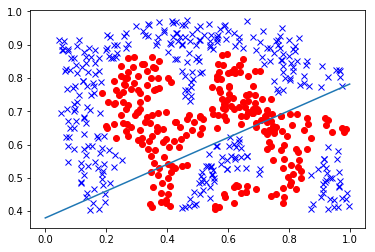

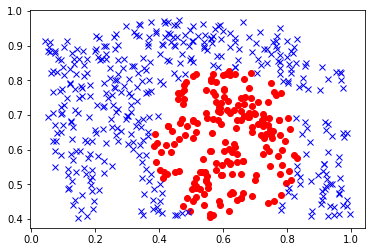

In [146]:
df_ry = pd.DataFrame(r_y,columns=['y'])
df_trained = pd.concat([df_x, df_ry], axis=1)

df_sub1 = df[df['y'] == 0]
df_sub2 = df[df['y'] == 1]
plt.plot(df_sub1['x1'],df_sub1['x2'],'ro')
plt.plot(df_sub2['x1'],df_sub2['x2'],'bx')
drawx2 = (-seta[0] - seta[1] * drawx1) / seta[2]
#for i,x1 in enumerate(drawx1):
plt.plot(drawx1,drawx2)

plt.figure()
df_sub11 = df_trained[df_trained['y'] == 0]
df_sub22 = df_trained[df_trained['y'] == 1]
plt.plot(df_sub11['x1'],df_sub11['x2'],'ro')
plt.plot(df_sub22['x1'],df_sub22['x2'],'bx')

In [143]:
df_trained

,x1,x2,0
0,0.146313,0.402632,NaN
1,0.367512,0.639620,NaN
2,0.563364,0.595760,NaN
3,0.123272,0.791667,NaN
4,0.173963,0.620322,NaN
5,0.268433,0.661550,NaN
6,0.337558,0.961257,NaN
7,0.770737,0.889620,NaN
8,0.190092,0.520175,NaN
9,0.346774,0.798977,NaN
